In [1]:
%load_ext autoreload
%autoreload 

import sys
sys.path.insert(0, "..")

import logging
from dotenv import load_dotenv
%load_ext dotenv 
%dotenv /path/to/connectors.env
from test_collection.get_gen_pop import *
from test_collection.get_data import *
from test_collection.get_splits import *
from test_collection.get_estimations import *
from test_collection.utils_check_config import *
from test_collection.get_results import *
from econometrics.supporting_func import *
from test_collection.utils_dir import *

In [2]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[
        logging.StreamHandler()
    ]
)

#### Загрузка конфига

In [5]:
config_path = "/path/to/test_params.py"
test_params = read_test_params(path=config_path)

#### Проверка корректности заполнения конфига

In [24]:
check_test_config(test_params=test_params)

2023-01-23 10:17:36,701 [INFO] Test's config is correct


#### Создание директории

In [7]:
create_directory(test_params)

2023-01-26 09:19:54,943 [INFO] Directory created


#### Загрузка файла генеральной совокупности и проверка его заполнения

In [25]:
gen_pop = get_gen_pop(test_params=test_params)
check_gen_pop(gen_pop, test_params)

2023-01-23 10:17:37,535 [INFO] Датафрейм генеральной совокупности корректен


#### Получение данных для CUPED оценки 

In [33]:
obs_data = get_all_data(test_params=test_params,
                        gen_pop=gen_pop,
                        obs=True)
exp_data = get_all_data(test_params=test_params,
                        gen_pop=gen_pop,
                        exp=True)

2023-01-23 10:36:24,483 [INFO] Collecting data from 2022-12-26 to 2023-01-08
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:29<00:00,  9.76s/it]
2023-01-23 10:36:53,765 [INFO] Initial data collected
/home/previna/AB-1085_v4/notebooks/../data/connectors.py:119: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return read_query(query, con=connection_class.session, *args, **kwargs)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.13s/it]
2023-01-23 10:36:58,091 [INFO] Stores id converted to uuid
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:20<00:00,  6.74s/it]
2023-01-23 10:37:18,329 [INFO] DOW added
2023-01-23 10:37:18,330 [IN

#### Получение сплитов и их фильтрация

In [28]:
strat_splits = get_splits(test_params=test_params, obs_metrics_agg=obs_data)
strat_splits_filtered = filter_split(test_params=test_params,
                                     strat_splits=strat_splits,
                                     obs_metrics=obs_data)

2022-12-09 16:33:45,832 [INFO] Data aggregation done
2022-12-09 16:33:45,835 [INFO] Bucketization done
2022-12-09 16:33:45,840 [INFO] Clusterization done, 416 clusters created
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:01<00:00,  1.62it/s]
2022-12-09 16:34:47,648 [INFO] Stratified splits created
2022-12-09 16:34:47,882 [INFO] Stratified splits successfully dumpted to AB_fix_split.pkl
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 67.52it/s]
2022-12-09 16:34:49,369 [INFO] Filtration done, 4 splits created
2022-12-09 16:34:49,580 [INFO] Stratified splits successfully dumpted to filtered_AB_fix_split.pkl


#### АА тесты

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.65it/s]
/home/previna/AB-1086/notebooks/../test_collection/get_estimations.py:94: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if save:
2022-12-09 16:35:01,476 [INFO] Simulations' results saved to FPR_AB_fix.md


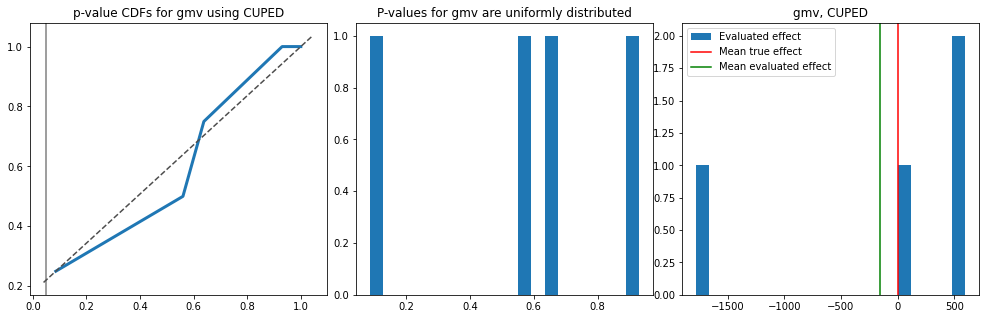

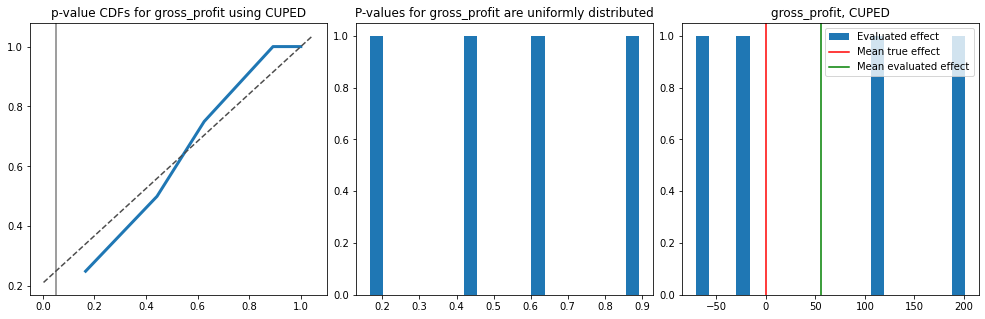

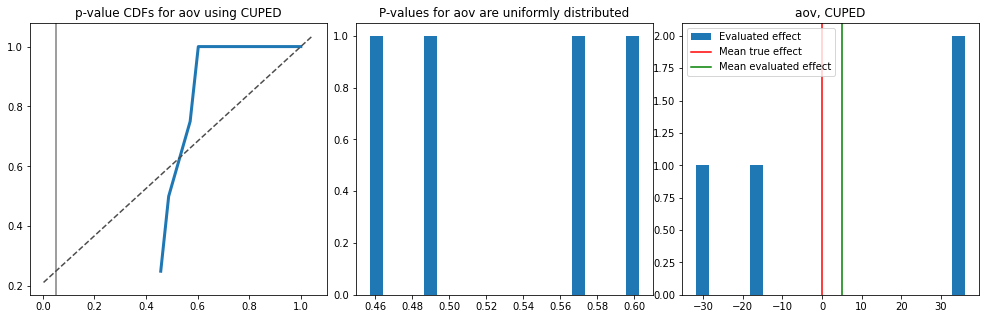

In [29]:
get_cuped_results(obs_metrics_agg=obs_data,
                  exp_metrics_agg=exp_data,
                  strat_splits=strat_splits_filtered,
                  test_params=test_params)

#### Генерация синтетического эффекта

In [30]:
effect_distribution = generate_general_effect_distribution(test_params=test_params,
                                                               exp_metrics=exp_data,
                                                               splits=strat_splits_filtered)
effect_distribution_ratio_plot = generate_effect_distribution_ratio(test_params=test_params,
                                                                        exp_data=exp_data,
                                                                        splits=strat_splits_filtered)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 157.00it/s]


#### АБ тесты

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.04it/s]
/home/previna/AB-1086/notebooks/../test_collection/get_estimations.py:94: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if save:
2022-12-09 16:35:05,989 [INFO] Simulations' results saved to power_AB_fix.md


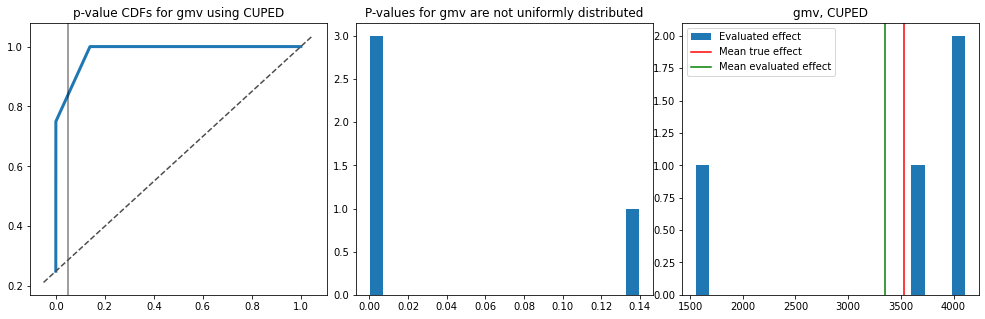

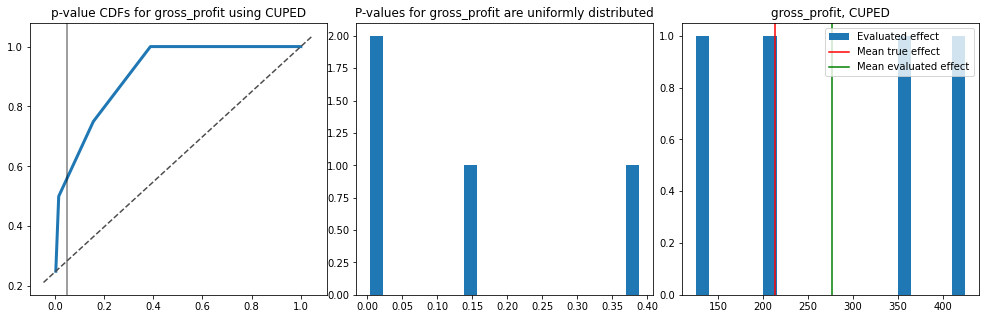

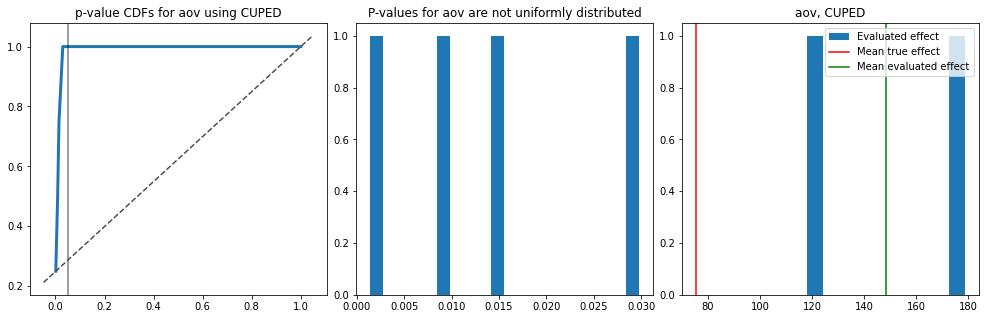

In [31]:
get_cuped_results(obs_metrics_agg=obs_data,
                      exp_metrics_agg=exp_data,
                      strat_splits=strat_splits_filtered,
                      test_params=test_params,
                      synth=True,
                      effect_distribution=effect_distribution,
                      effect_distribution_ratio_plot=effect_distribution_ratio_plot)

#### Получение итогового сплита

In [32]:
split = get_split_df(exp_metrics=exp_data,
                         test_params=test_params,
                         filtered=True)

2022-12-09 16:35:06,680 [INFO] Data aggregation done
2022-12-09 16:35:06,683 [INFO] Bucketization done
2022-12-09 16:35:06,688 [INFO] Clusterization done, 409 clusters created
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:01<00:00,  1.62it/s]
2022-12-09 16:36:08,430 [INFO] Stratified splits created
2022-12-09 16:36:08,670 [INFO] Stratified splits successfully dumpted to AB_fix_split.pkl
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.94it/s]
2022-12-09 16:36:10,265 [INFO] Filtration done, 3 splits created
2022-12-09 16:36:10,499 [INFO] Stratified splits successfully dumpted to filtered_AB_fix_split.pkl
2022-12-09 16:36:10,520 [INFO] Split saved to split_AB_fix.csv


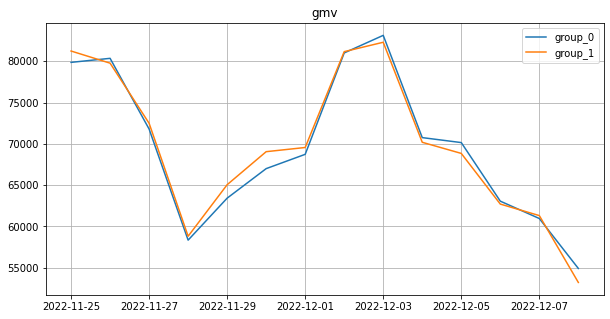

<Figure size 432x288 with 0 Axes>

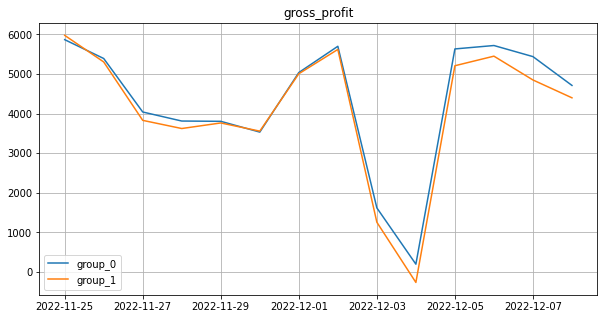

<Figure size 432x288 with 0 Axes>

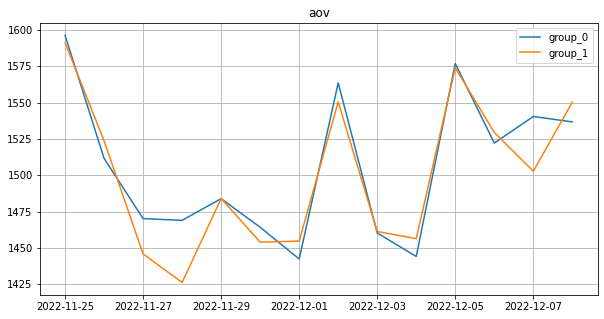

<Figure size 432x288 with 0 Axes>

In [33]:
plot_split_graph(split=split,
                     exp_metrics=exp_data,
                     test_params=test_params)

#### Оценка результатов

In [34]:
check_test_results_config(test_params=test_params)

2022-12-09 16:36:11,111 [INFO] Test's config is correct


In [44]:
evaluate_test_cuped(test_params=test_params)

2022-12-09 18:32:31,401 [INFO] Collecting data from 2022-10-24 to 2022-11-06
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:21<00:00,  7.15s/it]
2022-12-09 18:32:52,839 [INFO] Initial data collected
/home/previna/.cache/pypoetry/virtualenvs/ab-methodology-R1hV8bmk-py3.8/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.02it/s]
2022-12-09 18:33:00,064 [INFO] Stores id converted to uuid
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.05s/it]
2022-12-09 18:33:15,224 [INFO] DOW added
2022-12-09 18:33:15,225 [INFO]

'|    | Метрика      |   P-value |   Абсолютный эффект |   Относительный эффект |\n|---:|:-------------|----------:|--------------------:|-----------------------:|\n|  0 | gmv          |     0.532 |             389.409 |                  0.654 |\n|  1 | gross_profit |     0.972 |              -3.155 |                 -0.054 |\n|  2 | aov          |     0.562 |             -71.722 |                 -2.323 |'